In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Pour l'API (optionnel)
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List
import uvicorn

In [16]:
df = pd.read_csv("data/cameroon_crop_recommendation_dataset.csv")

In [17]:
df.head()

,crop,N,P,K,ph,humidity,temperature,rainfall,zone,variety
0,manioc,99.520242,37.825926,185.130163,6.758517,78.061962,27.132610,1852.543979,foret_humide,NaN
1,manioc,55.673781,36.188620,118.617658,5.829006,79.055238,28.621439,1617.247619,foret_humide,NaN
2,manioc,117.631539,46.974753,142.262486,6.160946,80.811337,26.842694,1658.986958,foret_humide,NaN
3,manioc,91.839130,44.931080,111.918241,6.236663,79.815591,27.436995,1521.823554,foret_humide,NaN
4,manioc,99.500957,50.827005,136.889288,6.304270,81.833572,29.353666,1947.902360,foret_humide,NaN


In [18]:
# Chargement du NOUVEAU dataset
df = pd.read_csv("data/cameroon_crop_recommendation_dataset.csv")

print(f"Shape du NOUVEAU dataset : {df.shape}")
print(f"Nombre d'échantillons : {len(df)}")
print(f"Nombre de cultures uniques : {df['crop'].nunique()}")
print(f"Cultures disponibles : {sorted(df['crop'].unique())}")

# Vérifier les 4 nouvelles plantes
print("\n=== NOUVELLES PLANTES AJOUTÉES ===")
original_plants = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 
                   'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 
                   'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 
                   'rice', 'watermelon']

new_plants = [plant for plant in df['crop'].unique() if plant not in original_plants]
print(f"Nouvelles plantes : {new_plants}")
print(f"Nombre de nouvelles plantes : {len(new_plants)}")

print("\nAperçu des données :")
df.head(20)

Shape du NOUVEAU dataset : (3000, 10)
Nombre d'échantillons : 3000
Nombre de cultures uniques : 8
Cultures disponibles : ['banane_plantain', 'cacao', 'cafe', 'haricot', 'mais', 'manioc', 'palmier_a_huile', 'tomate']

=== NOUVELLES PLANTES AJOUTÉES ===
Nouvelles plantes : ['manioc', 'mais', 'cacao', 'cafe', 'banane_plantain', 'haricot', 'palmier_a_huile', 'tomate']
Nombre de nouvelles plantes : 8

Aperçu des données :


,crop,N,P,K,ph,humidity,temperature,rainfall,zone,variety
0,manioc,99.520242,37.825926,185.130163,6.758517,78.061962,27.132610,1852.543979,foret_humide,NaN
1,manioc,55.673781,36.188620,118.617658,5.829006,79.055238,28.621439,1617.247619,foret_humide,NaN
2,manioc,117.631539,46.974753,142.262486,6.160946,80.811337,26.842694,1658.986958,foret_humide,NaN
3,manioc,91.839130,44.931080,111.918241,6.236663,79.815591,27.436995,1521.823554,foret_humide,NaN
4,manioc,99.500957,50.827005,136.889288,6.304270,81.833572,29.353666,1947.902360,foret_humide,NaN
5,manioc,103.454896,44.209309,169.595625,6.082906,82.192119,28.751005,1768.921072,foret_humide,NaN
6,manioc,102.512520,54.679579,144.991867,6.163624,76.073915,28.769962,1697.979246,foret_humide,NaN
7,manioc,69.587576,29.588889,135.213770,6.216118,75.228796,26.935736,1885.930662,foret_humide,NaN
8,manioc,107.423852,48.032285,144.049954,5.724760,72.892914,25.406265,1732.622041,foret_humide,NaN
9,manioc,95.763006,33.876424,81.760500,5.892425,83.168786,29.040956,1908.987873,foret_humide,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crop         3000 non-null   object 
 1   N            3000 non-null   float64
 2   P            3000 non-null   float64
 3   K            3000 non-null   float64
 4   ph           3000 non-null   float64
 5   humidity     3000 non-null   float64
 6   temperature  3000 non-null   float64
 7   rainfall     3000 non-null   float64
 8   zone         3000 non-null   object 
 9   variety      1200 non-null   object 
dtypes: float64(7), object(3)
memory usage: 234.5+ KB



=== STATISTIQUES DESCRIPTIVES ===
                 N            P            K           ph     humidity  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean    109.503502    45.677093   152.505663     6.068711    70.995197   
std      43.589262    13.817587    62.779462     0.419920    10.592808   
min      20.343949    15.087432    30.477607     4.744227    50.051903   
25%      83.794507    35.452913   114.512165     5.795221    61.941895   
50%     105.698648    44.137901   147.516761     6.091922    71.090687   
75%     136.315708    54.567499   187.365803     6.336747    80.114372   
max     248.978722    89.952339   347.321734     7.358372    89.997236   

       temperature     rainfall  
count  3000.000000  3000.000000  
mean     24.533868  1509.782324  
std       3.347425   629.687902  
min      18.001729   500.663252  
25%      21.927820   910.612200  
50%      24.926209  1560.671035  
75%      27.011821  2046.822837  
max      31.963399  2994.0

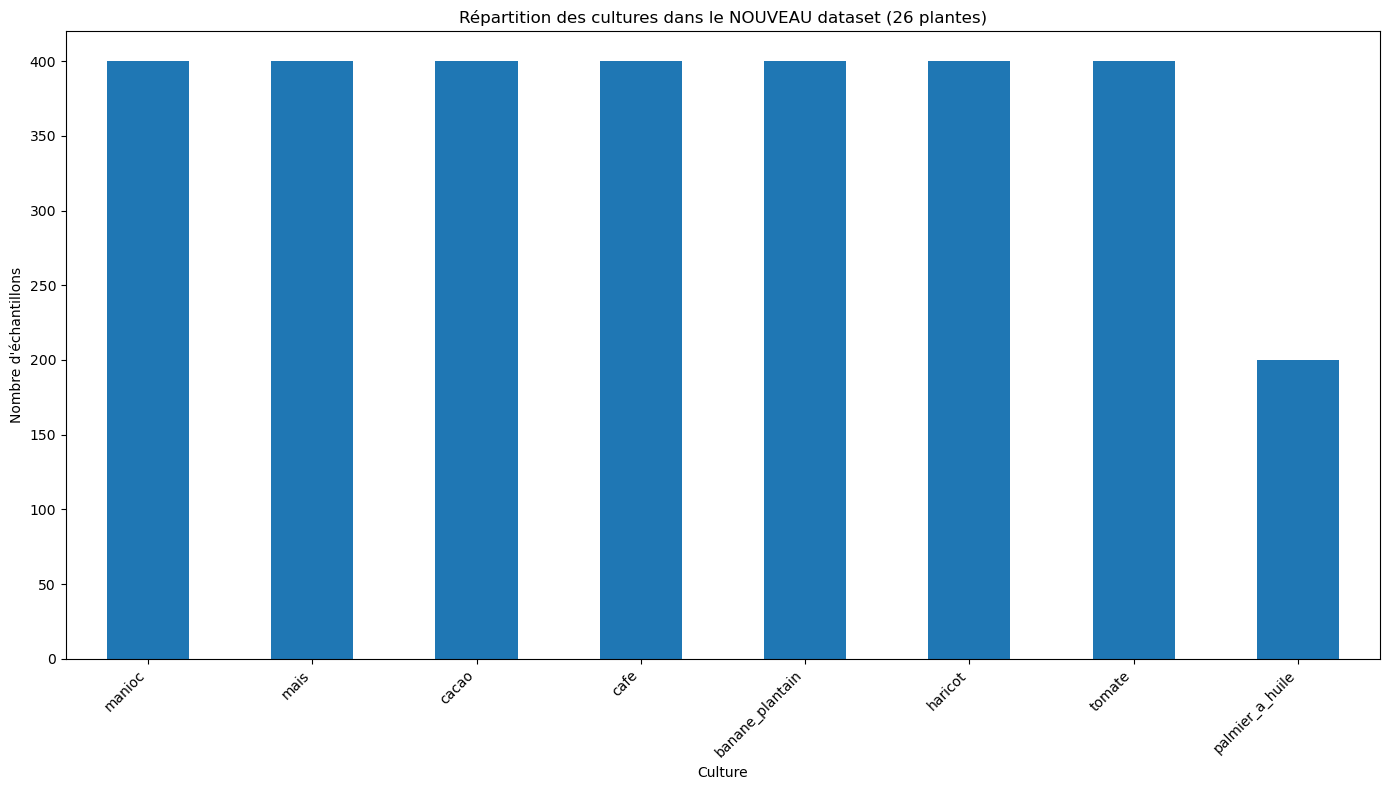

In [20]:
print("\n=== STATISTIQUES DESCRIPTIVES ===")
print(df.describe())

print("\n=== VÉRIFICATION DES VALEURS MANQUANTES ===")
print(df.isnull().sum())

print("\n=== RÉPARTITION DES CULTURES ===")
crop_distribution = df['crop'].value_counts()
print(f"Nombre d'échantillons par culture :")
print(crop_distribution)

# Visualisation de la répartition
plt.figure(figsize=(14, 8))
crop_distribution.plot(kind='bar')
plt.title('Répartition des cultures dans le NOUVEAU dataset (26 plantes)')
plt.xlabel('Culture')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Features et target
X = df.drop(['crop', 'zone', 'variety'], axis=1)
y = df['crop']

# Encodage des labels (26 cultures maintenant)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Classes encodées : {len(le.classes_)} cultures")
print("Mapping des cultures :")
for i, crop in enumerate(le.classes_):
    print(f"  {crop} → {i}")

Classes encodées : 8 cultures
Mapping des cultures :
  banane_plantain → 0
  cacao → 1
  cafe → 2
  haricot → 3
  mais → 4
  manioc → 5
  palmier_a_huile → 6
  tomate → 7


In [22]:
# Split avec stratification pour maintenir la distribution des classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Train set : {X_train.shape} | {len(y_train)} échantillons")
print(f"Test set : {X_test.shape} | {len(y_test)} échantillons")

# Vérification de la distribution
print("\nDistribution dans le train set :")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(le.inverse_transform(unique), counts):
    print(f"  {label}: {count} échantillons")

Train set : (2400, 7) | 2400 échantillons
Test set : (600, 7) | 600 échantillons

Distribution dans le train set :
  banane_plantain: 320 échantillons
  cacao: 320 échantillons
  cafe: 320 échantillons
  haricot: 320 échantillons
  mais: 320 échantillons
  manioc: 320 échantillons
  palmier_a_huile: 160 échantillons
  tomate: 320 échantillons


In [23]:
print("\n=== ENTRAÎNEMENT DU MODÈLE ===")

# Configuration du modèle
model = RandomForestClassifier(
    n_estimators=300,           # Augmenté pour mieux gérer plusieurs classes
    max_depth=20,               # Profondeur ajustée
    min_samples_split=5,        # Éviter le sur-apprentissage
    min_samples_leaf=2,         # Éviter le sur-apprentissage
    random_state=42,
    n_jobs=-1,                  # Utiliser tous les cœurs CPU
    class_weight='balanced',    # Important pour des classes déséquilibrées
    bootstrap=True,
    max_features='sqrt'         # Pour la diversité des arbres
)

print("Entraînement en cours...")
model.fit(X_train, y_train)
print("✓ Modèle entraîné avec succès!")

# Vérifier les features utilisées
print(f"\nFeatures utilisées : {list(X.columns)}")


=== ENTRAÎNEMENT DU MODÈLE ===
Entraînement en cours...
✓ Modèle entraîné avec succès!

Features utilisées : ['N', 'P', 'K', 'ph', 'humidity', 'temperature', 'rainfall']


Accuracy sur le test set : 0.9633
Soit 96.33%

=== RAPPORT DE CLASSIFICATION DÉTAILLÉ ===
(26 classes - attention à la lisibilité)


Métriques par culture :
--------------------------------------------------------------------------------
banane_plantain | Precision: 0.975 | Recall: 0.963 | F1: 0.969 | Support: 80.0
cacao           | Precision: 0.963 | Recall: 0.963 | F1: 0.963 | Support: 80.0
cafe            | Precision: 0.963 | Recall: 0.975 | F1: 0.969 | Support: 80.0
haricot         | Precision: 1.000 | Recall: 1.000 | F1: 1.000 | Support: 80.0
mais            | Precision: 0.936 | Recall: 0.912 | F1: 0.924 | Support: 80.0
manioc          | Precision: 0.975 | Recall: 0.988 | F1: 0.981 | Support: 80.0
palmier_a_huile | Precision: 1.000 | Recall: 0.975 | F1: 0.987 | Support: 40.0
tomate          | Precision: 0.915 | Recall: 0.938 | F1: 0.926 | Support: 80.0

Accuracy globale: 0.9633
Macro Avg F1: 0.9648
Weighted Avg F1: 0.9633


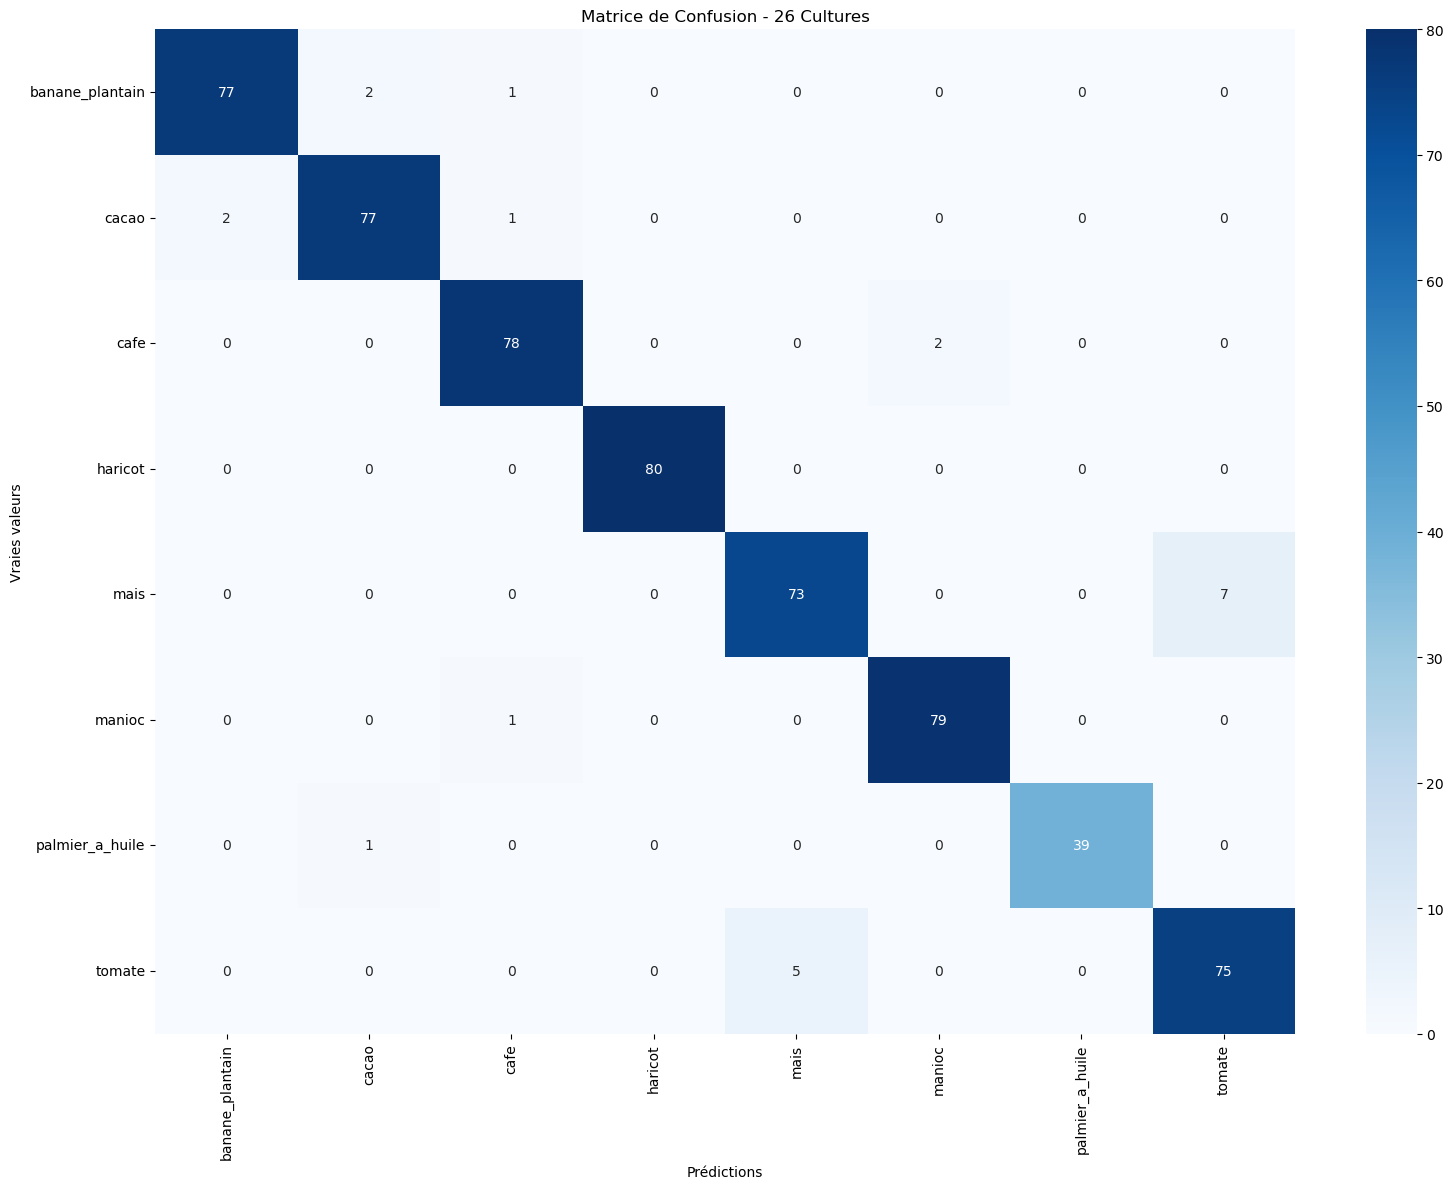

In [24]:
# Prédictions
y_pred = model.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le test set : {accuracy:.4f}")
print(f"Soit {accuracy*100:.2f}%")

# Rapport de classification détaillé
print("\n=== RAPPORT DE CLASSIFICATION DÉTAILLÉ ===")
print("(26 classes - attention à la lisibilité)")
print("\n" + "="*80)

# Créer un rapport plus lisible
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Afficher les métriques principales
print("\nMétriques par culture :")
print("-" * 80)
for crop in le.classes_:
    if crop in report:
        precision = report[crop]['precision']
        recall = report[crop]['recall']
        f1 = report[crop]['f1-score']
        support = report[crop]['support']
        print(f"{crop:15s} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f} | Support: {support}")

print("\n" + "="*80)
print(f"Accuracy globale: {report['accuracy']:.4f}")
print(f"Macro Avg F1: {report['macro avg']['f1-score']:.4f}")
print(f"Weighted Avg F1: {report['weighted avg']['f1-score']:.4f}")

# Matrice de confusion
plt.figure(figsize=(16, 12))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matrice de Confusion - 26 Cultures')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


=== IMPORTANCE DES CARACTÉRISTIQUES ===
       feature  importance
0            N    0.229182
6     rainfall    0.187441
2            K    0.153754
4     humidity    0.149633
5  temperature    0.138906
3           ph    0.074612
1            P    0.066473


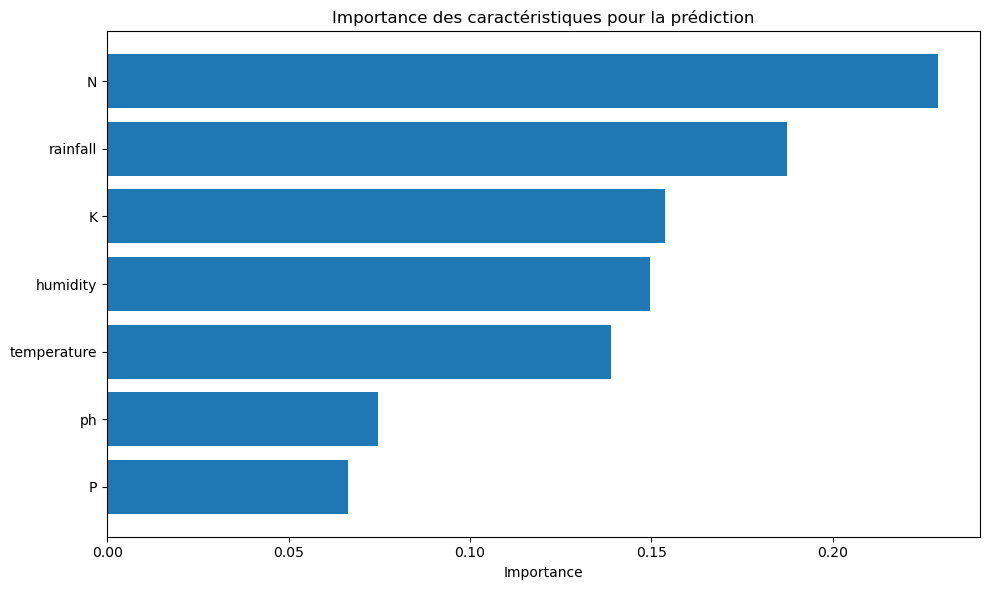

In [25]:
# Importance des features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== IMPORTANCE DES CARACTÉRISTIQUES ===")
print(feature_importance)

# Visualisation

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Importance des caractéristiques pour la prédiction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [28]:
# Sauvegarde pour l'API
import joblib

# Sauvegarder le modèle
joblib.dump(model, 'model/crop_recommendation_model_26crops.pkl')

# Sauvegarder l'encodeur
joblib.dump(le, 'model/label_encoder_26crops.pkl')

print("Modèle et encodeur sauvegardés dans le dossier 'model/'")
print(f"Modèle: crop_recommendation_model_26crops.pkl")
print(f"Encodeur: label_encoder_26crops.pkl")

# Vérification
model_loaded = joblib.load('model/crop_recommendation_model_26crops.pkl')
le_loaded = joblib.load('model/label_encoder_26crops.pkl')
print("\nVérification: Modèle et encodeur chargés avec succès!")

Modèle et encodeur sauvegardés dans le dossier 'model/'
Modèle: crop_recommendation_model_26crops.pkl
Encodeur: label_encoder_26crops.pkl

Vérification: Modèle et encodeur chargés avec succès!
